In [1]:
import numpy as np
import scipy.io
import numpy as np
import seaborn as sns
import pandas as pd
import random

## Trial...

In [2]:
mat_file_name = "./data_preprocessed_matlab/s01.mat"
mat_file = scipy.io.loadmat(mat_file_name)

In [3]:
type(mat_file)

dict

In [4]:
for i in mat_file:
    print(i)

__header__
__version__
__globals__
labels
data


In [5]:
mat_file['labels'].shape

(40, 4)

In [6]:
mat_file['labels'][:10] # (40, 2)로 바꾸기 : valence, arousal

array([[7.71, 7.6 , 6.9 , 7.83],
       [8.1 , 7.31, 7.28, 8.47],
       [8.58, 7.54, 9.  , 7.08],
       [4.94, 6.01, 6.12, 8.06],
       [6.96, 3.92, 7.19, 6.05],
       [8.27, 3.92, 7.  , 8.03],
       [7.44, 3.73, 7.08, 7.04],
       [7.32, 2.55, 6.32, 5.87],
       [4.04, 3.29, 3.62, 5.99],
       [1.99, 4.86, 2.04, 7.09]])

In [7]:
mat_file['labels']

array([[7.71, 7.6 , 6.9 , 7.83],
       [8.1 , 7.31, 7.28, 8.47],
       [8.58, 7.54, 9.  , 7.08],
       [4.94, 6.01, 6.12, 8.06],
       [6.96, 3.92, 7.19, 6.05],
       [8.27, 3.92, 7.  , 8.03],
       [7.44, 3.73, 7.08, 7.04],
       [7.32, 2.55, 6.32, 5.87],
       [4.04, 3.29, 3.62, 5.99],
       [1.99, 4.86, 2.04, 7.09],
       [2.99, 2.36, 3.63, 6.24],
       [2.71, 2.77, 3.4 , 7.35],
       [1.95, 3.12, 2.87, 6.18],
       [4.18, 2.24, 3.04, 5.04],
       [3.17, 8.08, 2.91, 5.04],
       [6.81, 7.44, 8.15, 7.14],
       [2.46, 6.91, 6.77, 6.41],
       [7.23, 7.15, 6.94, 8.01],
       [7.17, 8.  , 8.1 , 6.79],
       [8.26, 7.91, 7.19, 8.13],
       [9.  , 7.95, 8.37, 7.86],
       [7.09, 2.08, 7.06, 7.37],
       [8.15, 3.01, 7.37, 7.9 ],
       [7.04, 7.09, 8.01, 8.22],
       [8.86, 7.21, 8.65, 7.21],
       [7.28, 7.27, 7.41, 8.24],
       [7.35, 6.95, 7.03, 7.29],
       [3.88, 3.35, 4.01, 7.87],
       [1.36, 2.27, 3.  , 8.14],
       [2.08, 2.99, 3.22, 7.33],
       [3.

In [8]:
mat_file['data'].shape # (40, 32, 7680) : 앞쪽 3초 제거 (3sec * 128Hz)

(40, 40, 8064)

In [9]:
# (40, 2)로 바꾸기
import numpy as np
label_np = np.array(mat_file['labels'])
label_np_resized = label_np[:, :2]
label_np_resized.shape

(40, 2)

In [10]:
# (40, 32, 7680)로 바꾸기
data_np = np.array(mat_file['data'])
data_np_resized = data_np[:, :32, 384:]
data_np_resized.shape

(40, 32, 7680)

## label, data 읽고 resize

In [11]:
for i in range(1, 33):
    if i<10:
        mat_file_name = f"./data_preprocessed_matlab/s0{i}.mat"
        mat_file = scipy.io.loadmat(mat_file_name)
        
        # label resize
        label_np = np.array(mat_file['labels'])
        globals()[f"label_{i}_np"] = label_np[:, :2]
        
        # data resize
        data_np = np.array(mat_file['data'])
        globals()[f"data_{i}_np"] = data_np[:, :32, 384:]
    else:
        mat_file_name = f"./data_preprocessed_matlab/s{i}.mat"
        mat_file = scipy.io.loadmat(mat_file_name)
        
        label_np = np.array(mat_file['labels'])
        globals()[f"label_{i}_np"] = label_np[:, :2]
        
        # data resize
        data_np = np.array(mat_file['data'])
        globals()[f"data_{i}_np"] = data_np[:, :32, 384:]

In [12]:
label_1_np, data_1_np

(array([[7.71, 7.6 ],
        [8.1 , 7.31],
        [8.58, 7.54],
        [4.94, 6.01],
        [6.96, 3.92],
        [8.27, 3.92],
        [7.44, 3.73],
        [7.32, 2.55],
        [4.04, 3.29],
        [1.99, 4.86],
        [2.99, 2.36],
        [2.71, 2.77],
        [1.95, 3.12],
        [4.18, 2.24],
        [3.17, 8.08],
        [6.81, 7.44],
        [2.46, 6.91],
        [7.23, 7.15],
        [7.17, 8.  ],
        [8.26, 7.91],
        [9.  , 7.95],
        [7.09, 2.08],
        [8.15, 3.01],
        [7.04, 7.09],
        [8.86, 7.21],
        [7.28, 7.27],
        [7.35, 6.95],
        [3.88, 3.35],
        [1.36, 2.27],
        [2.08, 2.99],
        [3.03, 8.14],
        [2.28, 8.  ],
        [3.81, 3.85],
        [2.28, 7.09],
        [2.06, 8.15],
        [2.9 , 6.92],
        [2.31, 6.88],
        [3.33, 7.18],
        [3.24, 6.18],
        [5.1 , 7.12]]),
 array([[[ 4.05213000e+00,  2.89121020e+00, -1.77958774e+00, ...,
          -2.82648937e+00, -4.47722969e+00, -3.67692

## 시각화

In [13]:
import matplotlib.pyplot as plt

### labels

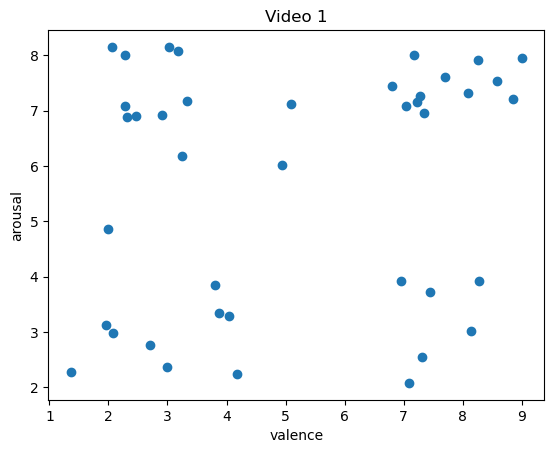

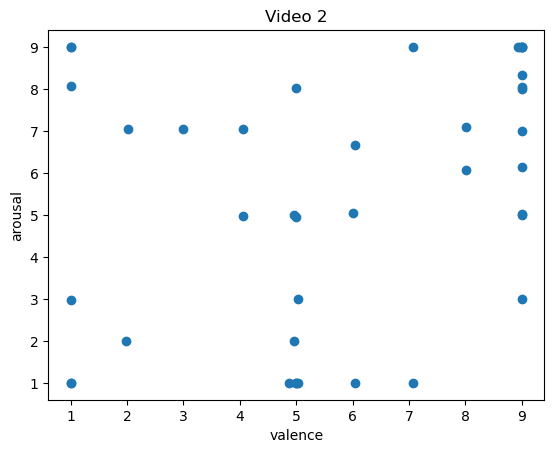

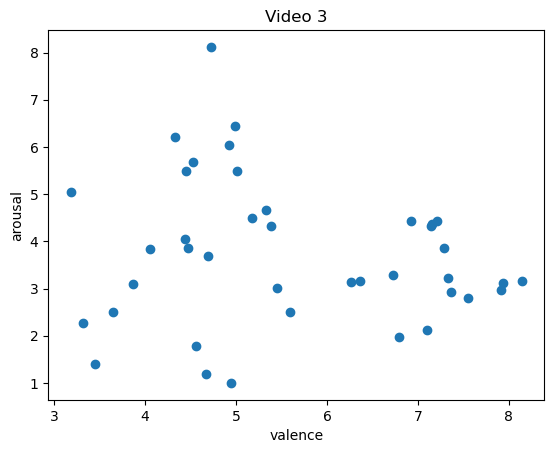

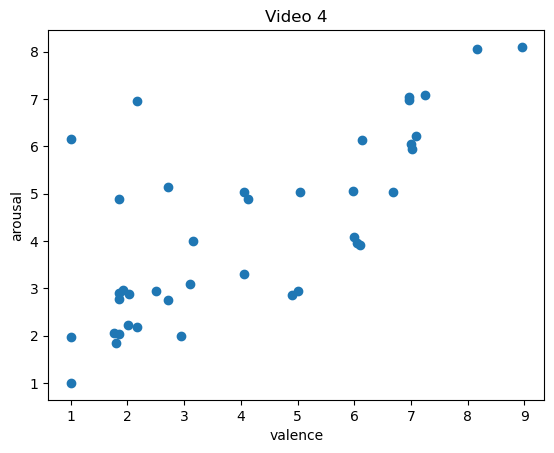

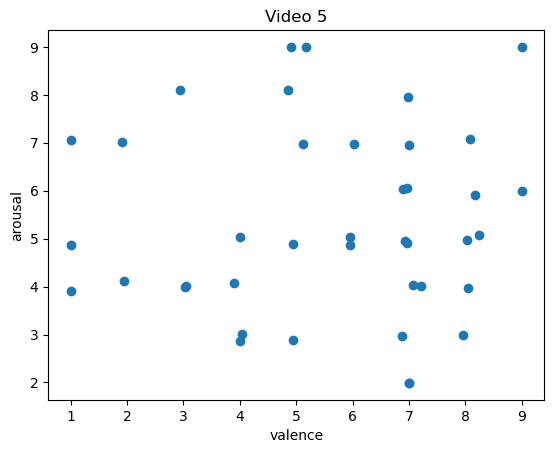

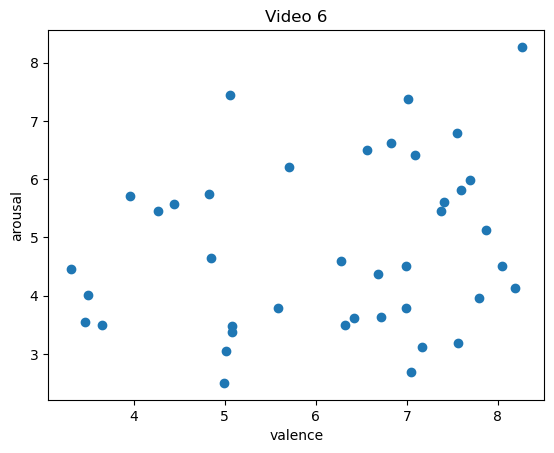

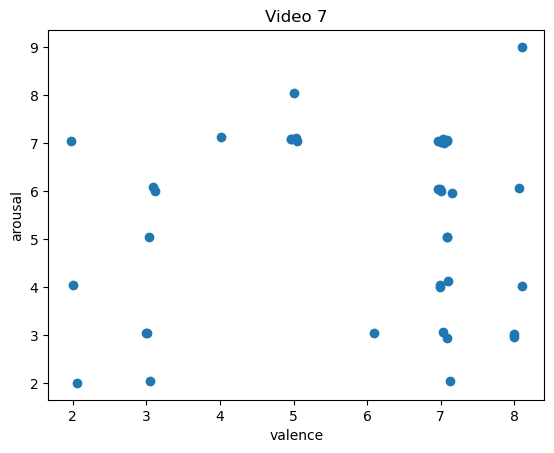

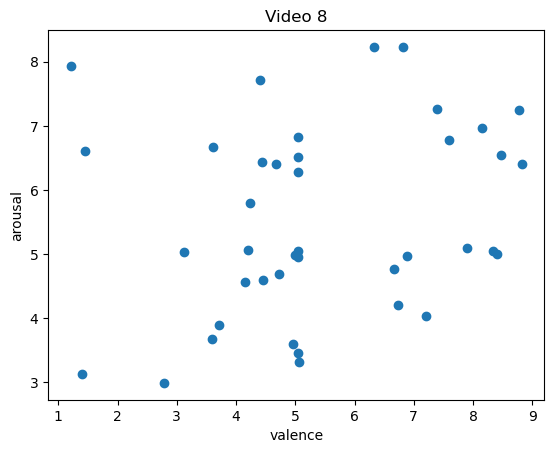

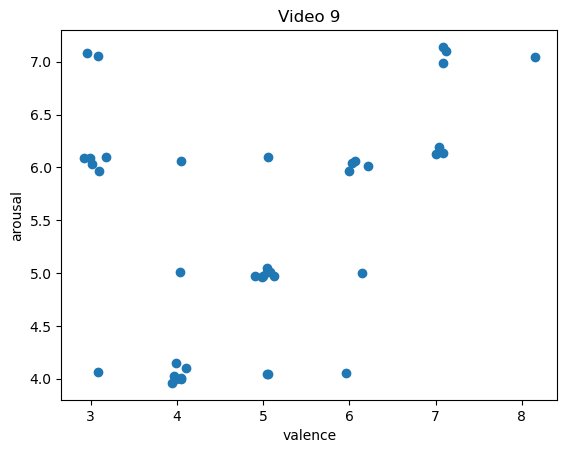

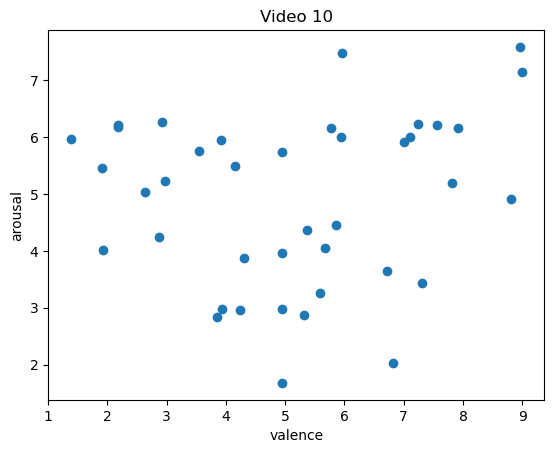

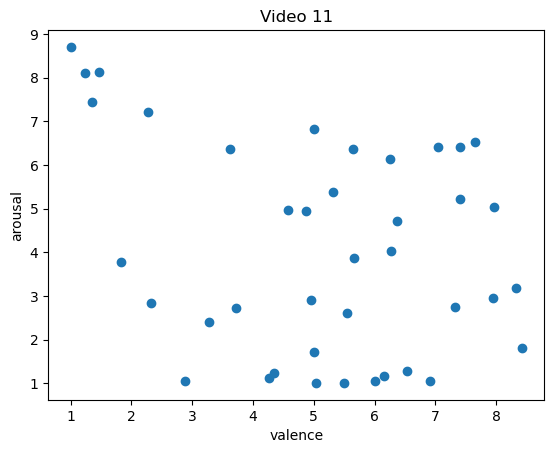

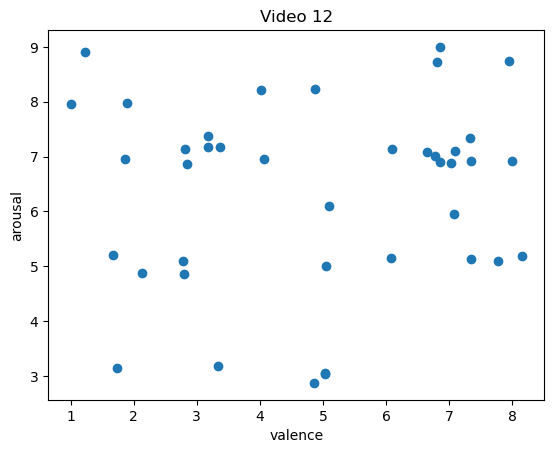

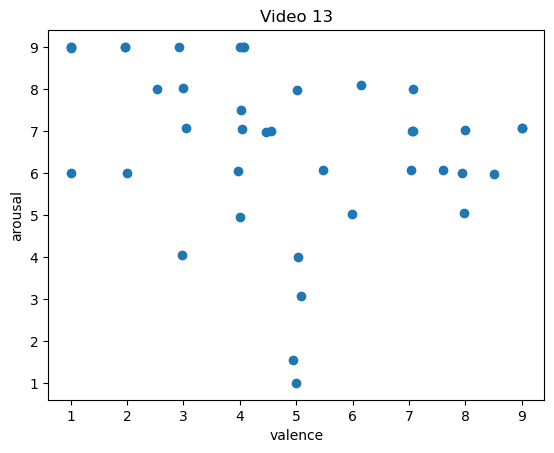

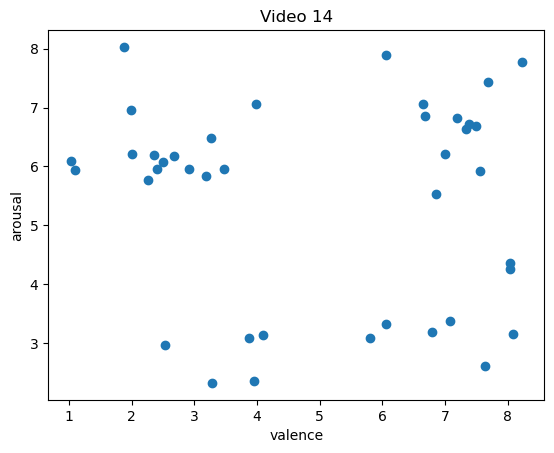

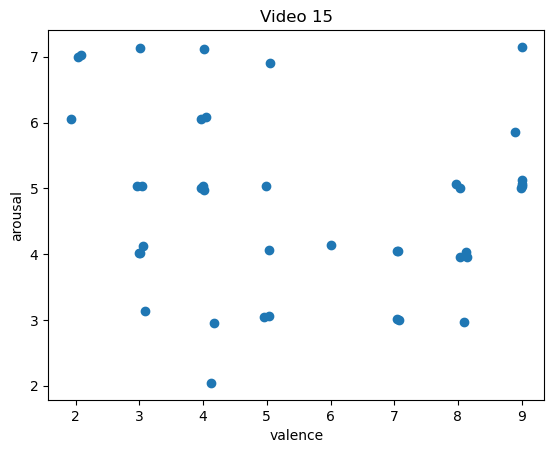

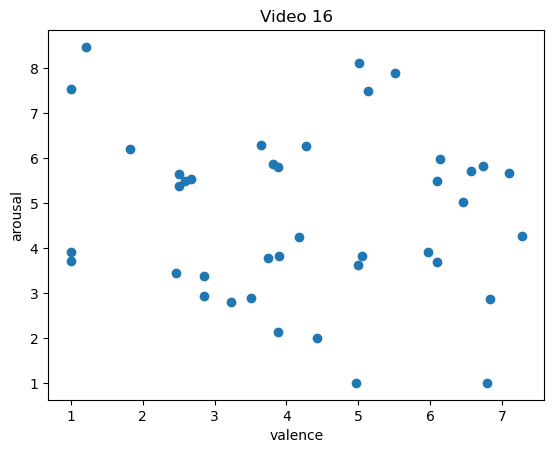

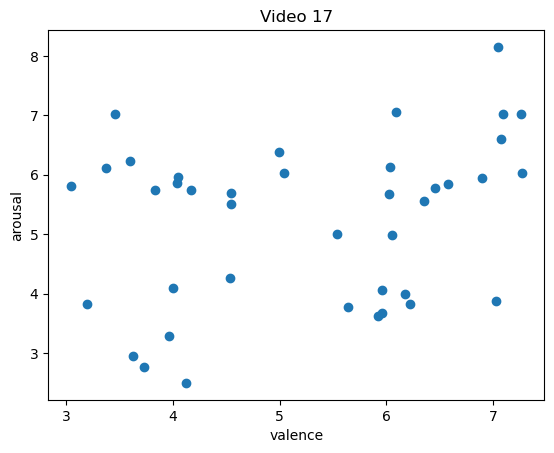

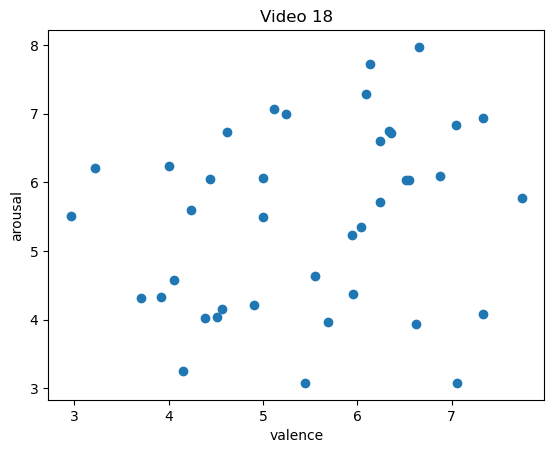

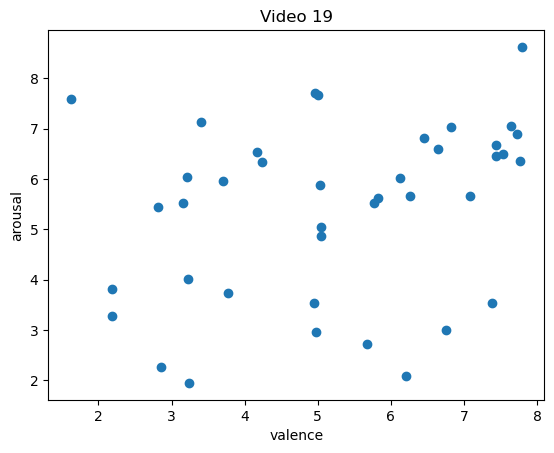

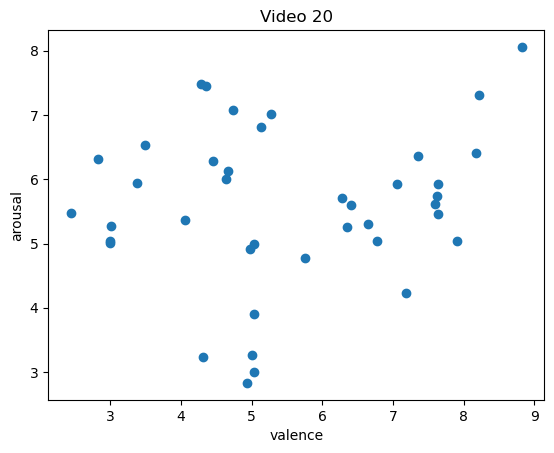

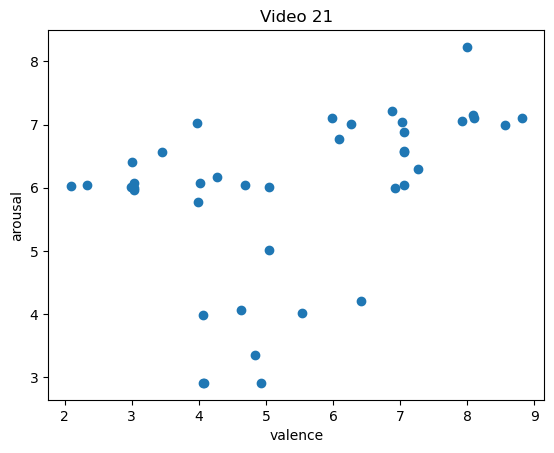

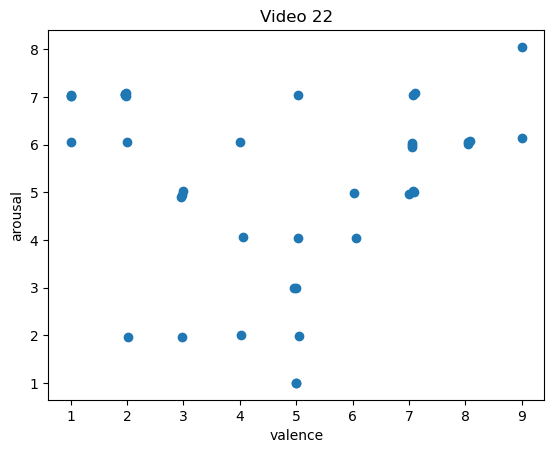

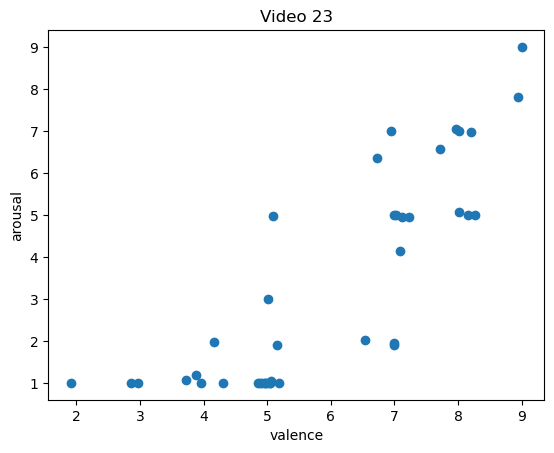

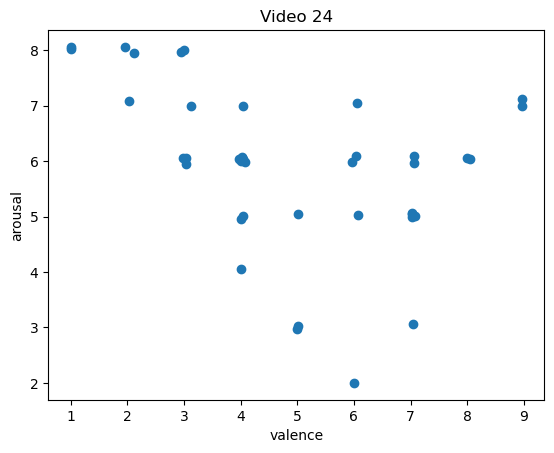

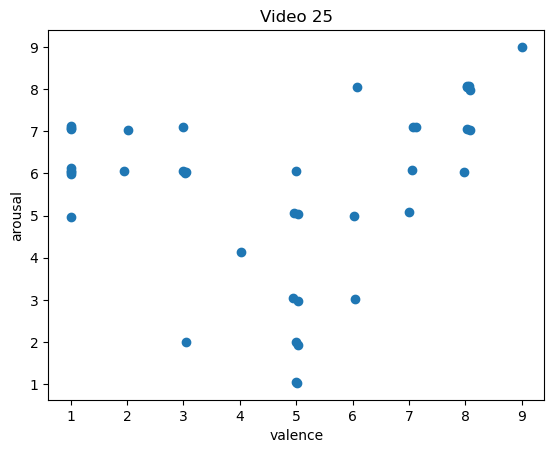

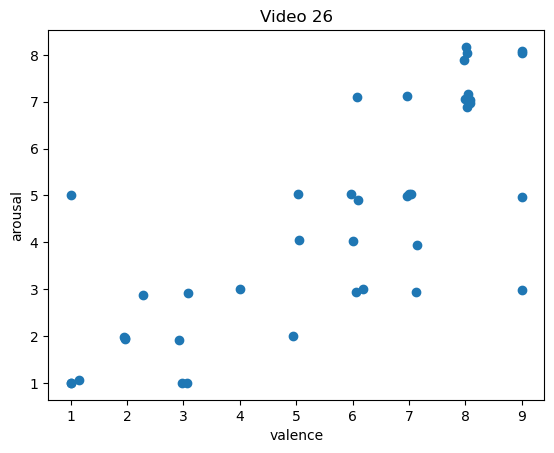

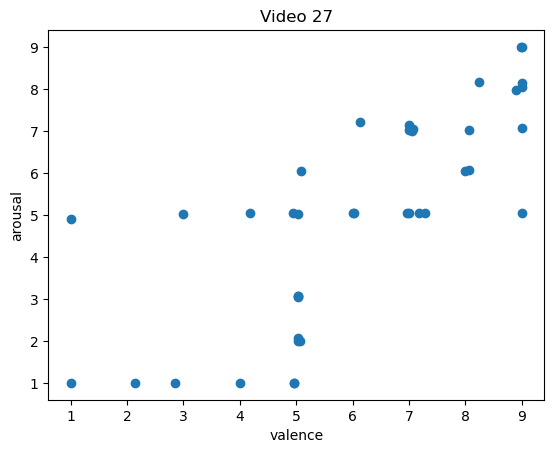

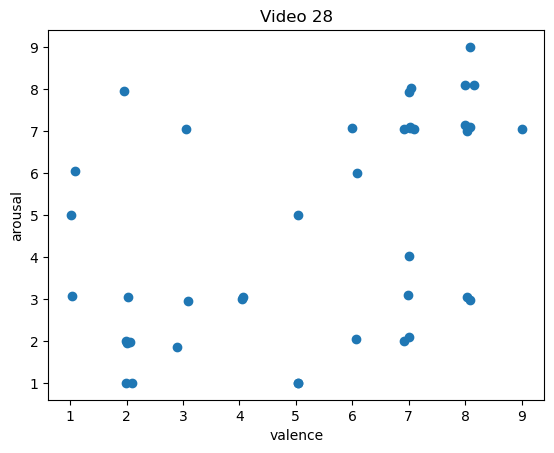

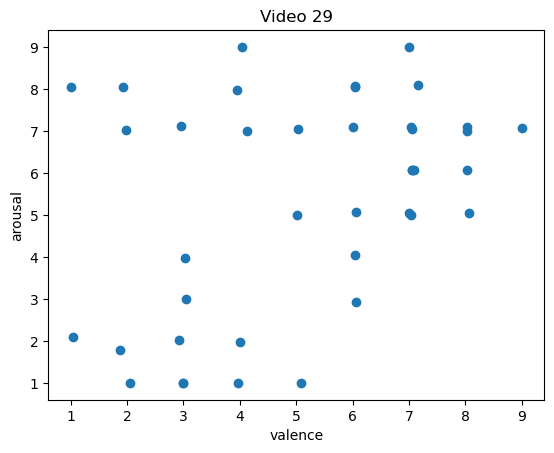

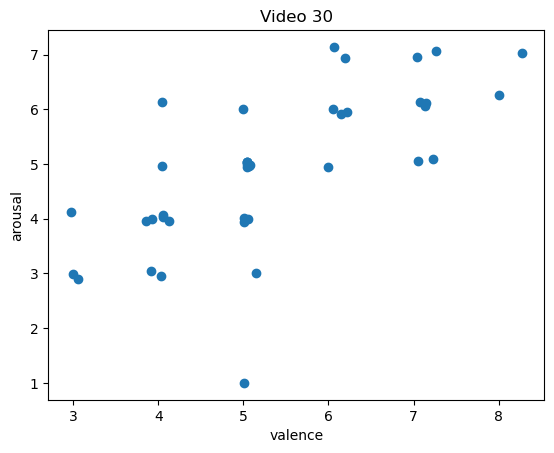

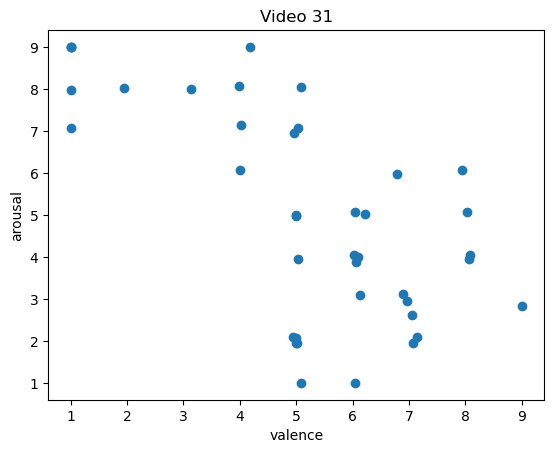

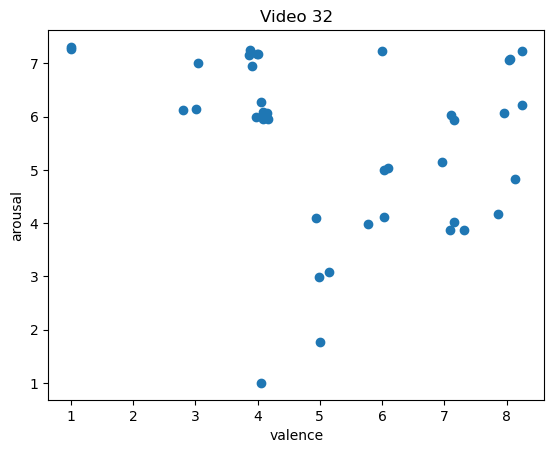

In [14]:
for i in range(1, 33):    
    plt.scatter(eval(f"label_{i}_np[:,0]"), eval(f"label_{i}_np[:,1]"))
    plt.xlabel("valence")
    plt.ylabel("arousal")
    plt.title(f"Video {i}")
    plt.show()

## train_test_split

#### binarize

In [15]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=4.5, copy=False)

for i in range(1, 33):
    binarizer.transform(eval(f"label_{i}_np"))

label_1_np

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [0., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 1.]])

In [16]:
label_1_np.shape

(40, 2)

#### categoize
label_concat DateFrame을 만들고 column으로 va_00, va_01, va_10, va_11을 지정한다. 총 32개의 video에 대해서 각 카테고리에 해당하는 분포가 어떻게 되는지 저장한다.

In [17]:
va_00 = []
for i in range(1, 33):
    va_00.append(np.sum([(eval(f"label_{i}_np[{j}]") == [0, 0]).all() for j in range(40)]))
len(va_00)

32

In [18]:
va_01 = []
for i in range(1, 33):
    va_01.append(np.sum([(eval(f"label_{i}_np[{j}]") == [0, 1]).all() for j in range(40)]))
len(va_01)

32

In [19]:
va_10 = []
for i in range(1, 33):
    va_10.append(np.sum([(eval(f"label_{i}_np[{j}]") == [1, 0]).all() for j in range(40)]))
len(va_10)

32

In [20]:
va_11 = []
for i in range(1, 33):
    va_11.append(np.sum([(eval(f"label_{i}_np[{j}]") == [1, 1]).all() for j in range(40)]))
len(va_11)

32

In [21]:
label_concat = pd.DataFrame({
    "va_00" : va_00,
    "va_01" : va_01,
    "va_10" : va_10,
    "va_11" : va_11
})
label_concat

,va_00,va_01,va_10,va_11
0,9,11,6,14
1,4,7,9,20
2,7,3,24,6
3,17,6,5,12
4,7,5,8,20
5,4,3,17,16
6,5,5,10,20
7,4,10,5,21
8,8,9,3,20
9,6,10,11,13


### 순서대로 나누기

In [22]:
# test_size = 0.2
train_data = label_concat[:26]
test_data = label_concat[26:]
train_data

,va_00,va_01,va_10,va_11
0,9,11,6,14
1,4,7,9,20
2,7,3,24,6
3,17,6,5,12
4,7,5,8,20
5,4,3,17,16
6,5,5,10,20
7,4,10,5,21
8,8,9,3,20
9,6,10,11,13


#### 분포 시각화

### 랜덤하게 나누기

#### random index

In [23]:
idx = np.arange(32)
train_idx = np.random.choice(32, size=26, replace=False)
test_idx = np.delete(arr=idx, obj=train_idx)

In [24]:
train_data = label_concat.iloc[train_idx]
test_data = label_concat.iloc[test_idx]

In [25]:
train_data

,va_00,va_01,va_10,va_11
27,11,4,9,16
12,1,19,4,16
0,9,11,6,14
13,5,15,8,12
11,2,15,3,20
21,4,14,7,15
9,6,10,11,13
29,10,2,5,23
30,0,11,19,10
14,6,12,12,10


In [26]:
test_data

,va_00,va_01,va_10,va_11
2,7,3,24,6
16,6,8,8,18
18,6,8,6,20
22,8,0,16,16
25,12,1,8,19
28,10,7,3,20


#### 분포 시각화